In [1]:
%matplotlib notebook
import Ska.engarchive.fetch_eng as fetch
from kadi import events
import numpy as np
import Chandra.Time
from Ska.Matplotlib import plot_cxctime
import matplotlib.pyplot as plt
import datetime as dt
import urllib.request
import re
import math
from Chandra.Time import DateTime
import scipy as sp
import scipy.interpolate

In [224]:
tstart = '2019:296:19:00:00.000'
tstop = '2019:300:00:00:00.000'
#tstop = dt.datetime.now()

In [225]:
mupsa2 = fetch.Msid('pm2thv2t',tstart,tstop)
##elbi = fetch.Msid('ELBI_LOW',tstart,tstop)
#ecl_p3 = fetch.Msid('PLINE03T',tstart,tstop)
#ecl_p4 = fetch.Msid('PLINE04T',tstart,tstop)
#ecl_p2.select_intervals(events.eclipses)
#ecl_p3.select_intervals(events.eclipses)
#ecl_p4.select_intervals(events.eclipses)

<IPython.core.display.Javascript object>


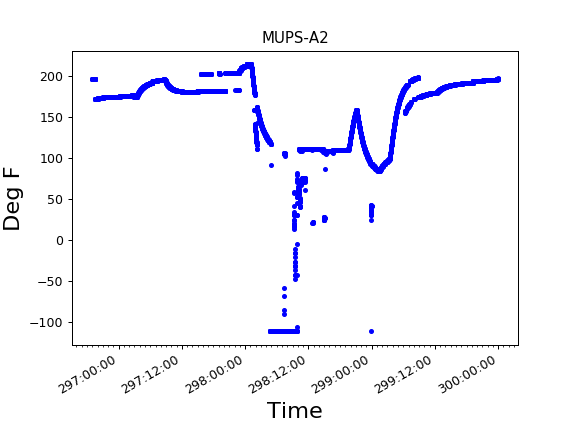

In [226]:
fig =plt.figure()
xdata=mupsa2.times
ydata=mupsa2.vals
plot_cxctime(xdata,ydata,'b.')
plt.xlabel('Time',fontsize=18)
plt.ylabel('Deg F',fontsize=18)
plt.title('MUPS-A2')
#plt.axhline(y=112, color='r', linestyle='-')
#plt.axhline(y=132, color='r', linestyle='-')
#plt.axhline(y=162, color='r', linestyle='-')
#plt.ylim(110,200)
#fig.savefig('pline02t_eclipses.png')

In [227]:
pp_counts = [0,27,36,44,55,70,90,118,175,195,210,219,226,231,235,255]
pp_temps =  [369.53,263.32577,239.03652,222.30608,203.6944,183.2642,161.0796,134.93818,85.65725,65.6537,47.3176,33.50622,
                19.9373,7.42435,-5.79635,-111.7726]

In [228]:
x = np.polyfit(pp_counts,pp_temps,8)
count_to_degf = p = np.poly1d(x)
x = np.polyfit(pp_temps,pp_counts,8)
degf_to_counts = p = np.poly1d(x)

In [229]:
counts = np.arange(0,256)

<IPython.core.display.Javascript object>


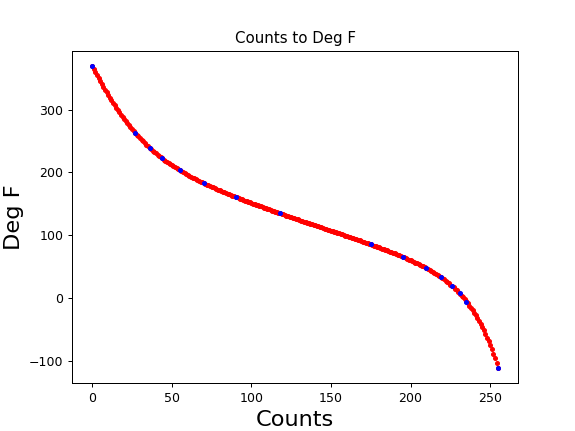

In [230]:
fig =plt.figure()

plt.plot(counts,count_to_degf(counts),'r.')
plt.plot(pp_counts,pp_temps,'b.')

plt.xlabel('Counts',fontsize=18)
plt.ylabel('Deg F',fontsize=18)
plt.title('Counts to Deg F')
#plt.axhline(y=112, color='r', linestyle='-')
#plt.axhline(y=132, color='r', linestyle='-')
#plt.axhline(y=162, color='r', linestyle='-')
#plt.ylim(110,200)
#fig.savefig('pline02t_eclipses.png')

In [232]:
degf_to_counts(220)

45.231079648835959

In [233]:
volts = np.arange(0,5.12,0.02)

In [234]:
x = np.polyfit(counts,volts,8)
count_to_volts = p = np.poly1d(x)
x = np.polyfit(volts,counts,8)
volts_to_counts = p = np.poly1d(x)

In [235]:
len(counts)

256

<IPython.core.display.Javascript object>


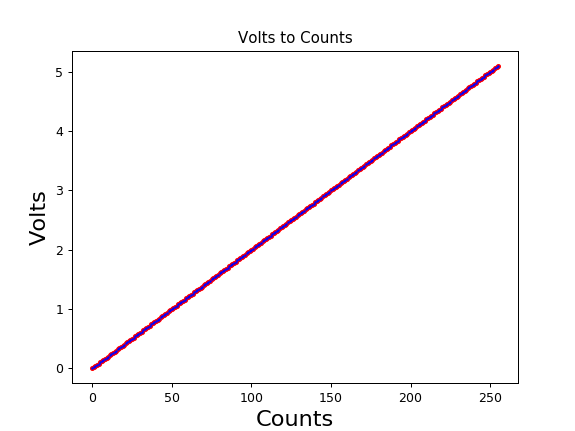

In [236]:
fig =plt.figure()

plt.plot(counts,count_to_volts(counts),'r.')
plt.plot(counts,volts,'b.',markersize=2)

plt.xlabel('Counts',fontsize=18)
plt.ylabel('Volts',fontsize=18)
plt.title('Volts to Counts')
#plt.axhline(y=112, color='r', linestyle='-')
#plt.axhline(y=132, color='r', linestyle='-')
#plt.axhline(y=162, color='r', linestyle='-')
#plt.ylim(110,200)
#fig.savefig('pline02t_eclipses.png')

In [241]:
volt_with_res = [4.153325779,3.676396578,3.175100371,2.587948965,2.435,2.025223702,1.538506813,1.148359251,0.63128179,0.354868907,0.208375569]

In [242]:
volt_without_res = [28.223,15,9.1231,5.5228,4.87,3.467,2.249,1.5027,0.7253,0.38276,0.21769]

In [243]:
x = np.polyfit(volt_with_res,volt_without_res,8)
volt_with_to_volt_without = p = np.poly1d(x)
x = np.polyfit(volt_without_res,volt_with_res,8)
volt_without_to_volt_with = p = np.poly1d(x)

In [244]:
def correct_dropout(temp):
    count = degf_to_counts(temp)
    volt = count_to_volts(count)
    new_volt = volt_without_to_volt_with(volt)
    new_count = volts_to_counts(new_volt)
    new_temp = count_to_degf(new_count)
    return new_temp
    
    

<IPython.core.display.Javascript object>


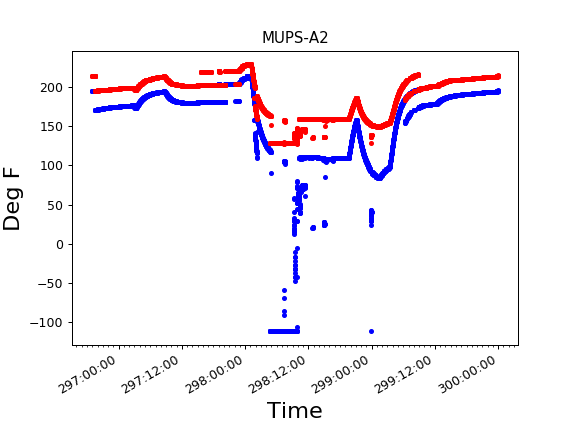

In [245]:
fig =plt.figure()
xdata=mupsa2.times
ydata=mupsa2.vals
ydata2 = [correct_dropout(x) for x in mupsa2.vals]
plot_cxctime(xdata,ydata,'b.')
plot_cxctime(xdata,ydata2,'r.')
plt.xlabel('Time',fontsize=18)
plt.ylabel('Deg F',fontsize=18)
plt.title('MUPS-A2')
#plt.axhline(y=112, color='r', linestyle='-')
#plt.axhline(y=132, color='r', linestyle='-')
#plt.axhline(y=162, color='r', linestyle='-')
#plt.ylim(110,200)
#fig.savefig('pline02t_eclipses.png')

In [246]:
corrected_temps = []
truth = mupsa2.vals[0]
corrected_temp = truth
corrected_temps.append(corrected_temp)

for count in np.arange(len(mupsa2.vals)-1):
    telem_temp = mupsa2.vals[count+1]
    new_temp = correct_dropout(telem_temp)
    if telem_temp > 128.9:
        if abs(corrected_temp - telem_temp)  < abs(corrected_temp - new_temp):
            corrected_temp = telem_temp
        else:
            corrected_temp = new_temp
    corrected_temps.append(corrected_temp)
    
    
    

In [247]:
corrected_temps

[195.52231,
 195.52231,
 195.52231,
 195.52231,
 195.52231,
 195.52231,
 195.52231,
 195.52231,
 195.52231,
 195.52231,
 195.52231,
 195.52231,
 195.52231,
 195.52231,
 195.52231,
 195.52231,
 195.52231,
 195.52231,
 195.52231,
 195.52231,
 195.52231,
 195.52231,
 195.52231,
 195.52231,
 195.52231,
 195.52231,
 195.52231,
 195.52231,
 195.52231,
 195.52231,
 195.52231,
 195.52231,
 195.52231,
 195.52231,
 195.52231,
 195.52231,
 195.52231,
 195.52231,
 195.52231,
 195.52231,
 195.52231,
 195.52231,
 195.52231,
 195.52231,
 195.52231,
 195.52231,
 195.52231,
 195.52231,
 195.52231,
 195.52231,
 195.52231,
 195.52231,
 195.52231,
 195.52231,
 195.52231,
 195.52231,
 195.52231,
 195.52231,
 195.52231,
 195.52231,
 195.37073176080531,
 195.37073176080531,
 195.37073176080531,
 195.37073176080531,
 195.37073176080531,
 195.37073176080531,
 195.37073176080531,
 195.37073176080531,
 195.37073176080531,
 195.37073176080531,
 195.37073176080531,
 195.37073176080531,
 195.37073176080531,
 195.37

<IPython.core.display.Javascript object>


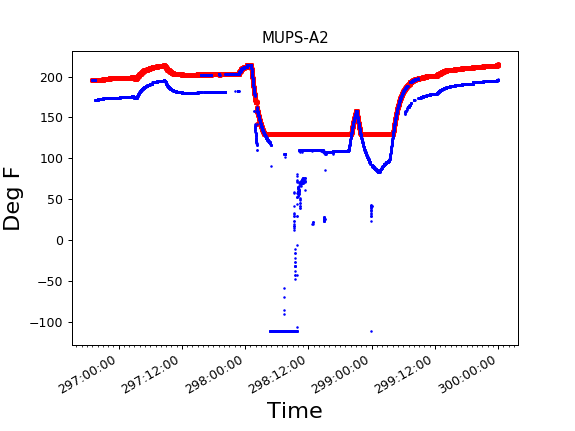

In [248]:
fig =plt.figure()
xdata=mupsa2.times
ydata=corrected_temps

plot_cxctime(xdata,ydata,'r.')
plot_cxctime(mupsa2.times,mupsa2.vals,'b.',markersize=2)
plt.xlabel('Time',fontsize=18)
plt.ylabel('Deg F',fontsize=18)
plt.title('MUPS-A2')
#plt.axhline(y=112, color='r', linestyle='-')
#plt.axhline(y=132, color='r', linestyle='-')
#plt.axhline(y=162, color='r', linestyle='-')
#plt.ylim(110,200)
#fig.savefig('pline02t_eclipses.png')